#### Forecasting Using FbProphet

In [10]:
from prophet import Prophet

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from google.colab import files
files.upload()

Saving airline_passengers.csv to airline_passengers (1).csv


{'airline_passengers (1).csv': b'"Month","Thousands of Passengers"\n"1949-01",112\n"1949-02",118\n"1949-03",132\n"1949-04",129\n"1949-05",121\n"1949-06",135\n"1949-07",148\n"1949-08",148\n"1949-09",136\n"1949-10",119\n"1949-11",104\n"1949-12",118\n"1950-01",115\n"1950-02",126\n"1950-03",141\n"1950-04",135\n"1950-05",125\n"1950-06",149\n"1950-07",170\n"1950-08",170\n"1950-09",158\n"1950-10",133\n"1950-11",114\n"1950-12",140\n"1951-01",145\n"1951-02",150\n"1951-03",178\n"1951-04",163\n"1951-05",172\n"1951-06",178\n"1951-07",199\n"1951-08",199\n"1951-09",184\n"1951-10",162\n"1951-11",146\n"1951-12",166\n"1952-01",171\n"1952-02",180\n"1952-03",193\n"1952-04",181\n"1952-05",183\n"1952-06",218\n"1952-07",230\n"1952-08",242\n"1952-09",209\n"1952-10",191\n"1952-11",172\n"1952-12",194\n"1953-01",196\n"1953-02",196\n"1953-03",236\n"1953-04",235\n"1953-05",229\n"1953-06",243\n"1953-07",264\n"1953-08",272\n"1953-09",237\n"1953-10",211\n"1953-11",180\n"1953-12",201\n"1954-01",204\n"1954-02",188\n"1

In [13]:
df=pd.read_csv('airline_passengers.csv')

In [14]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [15]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


<Axes: >

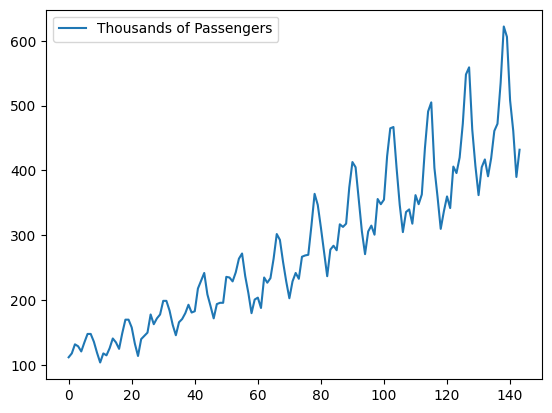

In [16]:
df.plot()

In [17]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [18]:
df.drop(144,axis=0,inplace=True)

In [19]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [20]:
df['ds'] = pd.to_datetime(df['ds'])

In [21]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [22]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [25]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

In [26]:
# Initialize the Model
model=Prophet()

In [27]:
df.columns

Index(['ds', 'y'], dtype='object')

In [28]:
df.dropna(axis=0,inplace=True)

In [29]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [30]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpflsnxu1g/xwsn2833.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpflsnxu1g/yfi8ht7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2353', 'data', 'file=/tmp/tmpflsnxu1g/xwsn2833.json', 'init=/tmp/tmpflsnxu1g/yfi8ht7m.json', 'output', 'file=/tmp/tmpflsnxu1g/prophet_modeluasitbzd/prophet_model-20250212191714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:17:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:17:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [32]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [33]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [34]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [35]:
prediction=model.predict(future_dates)

In [36]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,54.940789,116.176069,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,48.553126,109.397975,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,82.596400,140.305568,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,79.999167,136.260625,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,82.917086,139.905911,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281


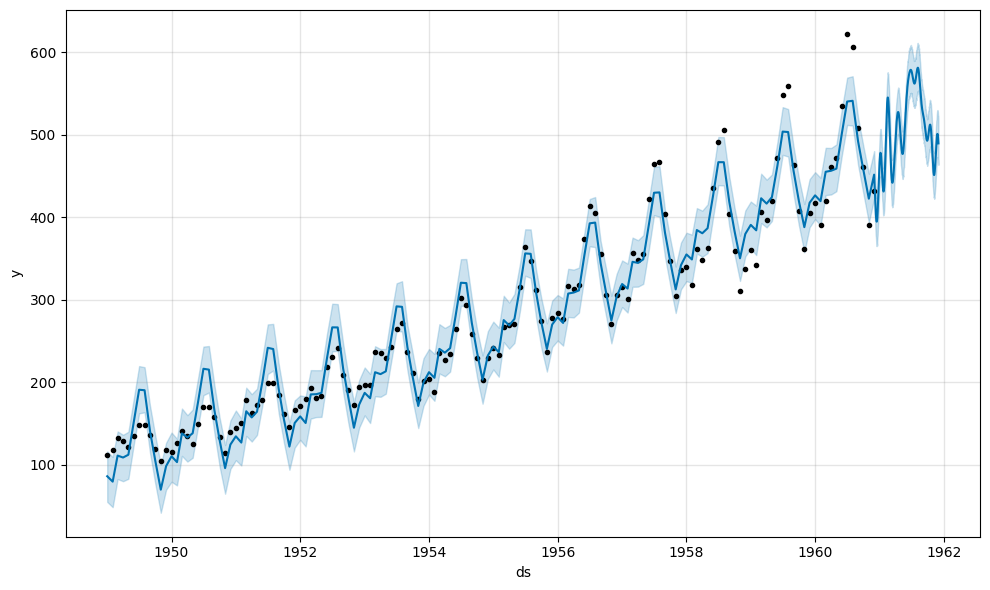

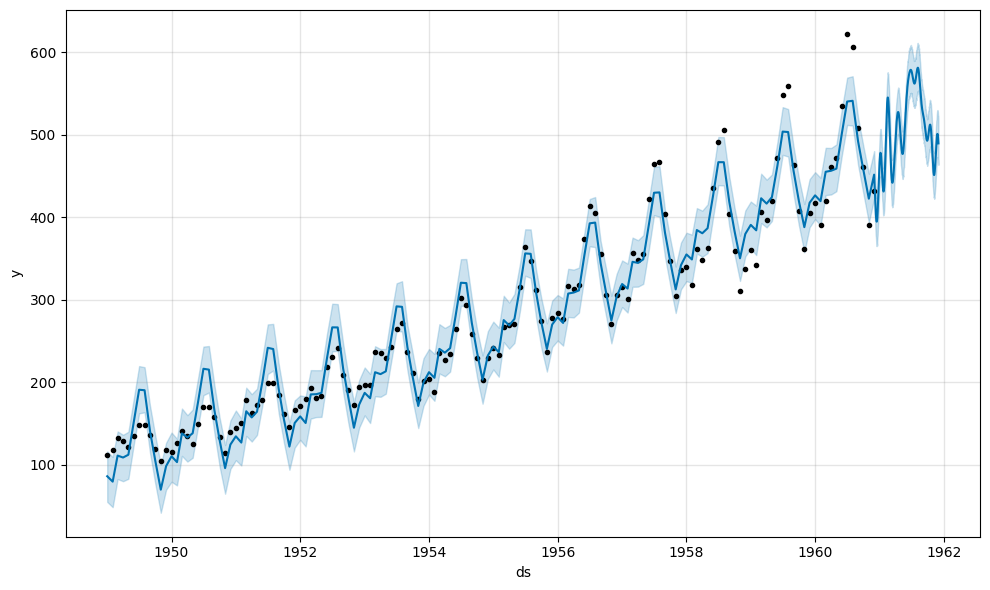

In [37]:
### plot the predicted projection
model.plot(prediction)

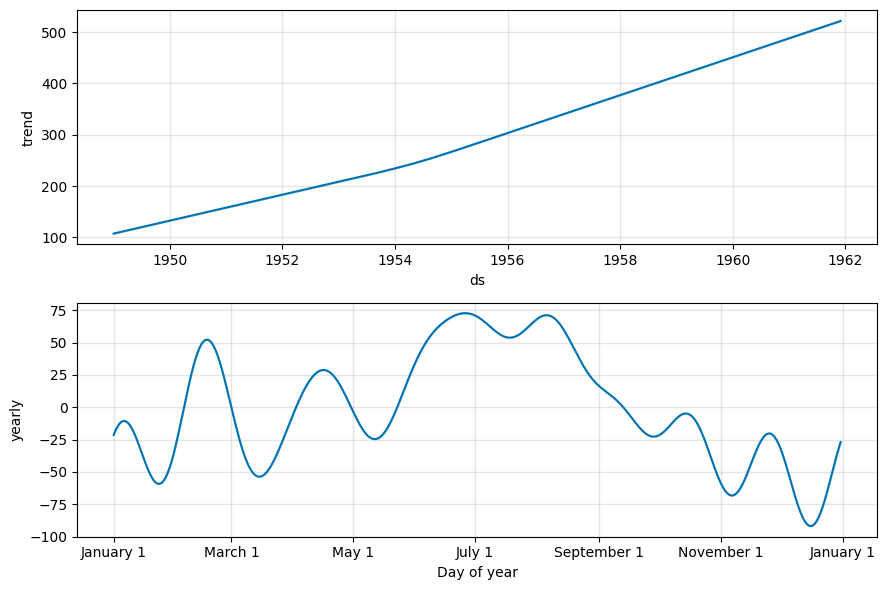

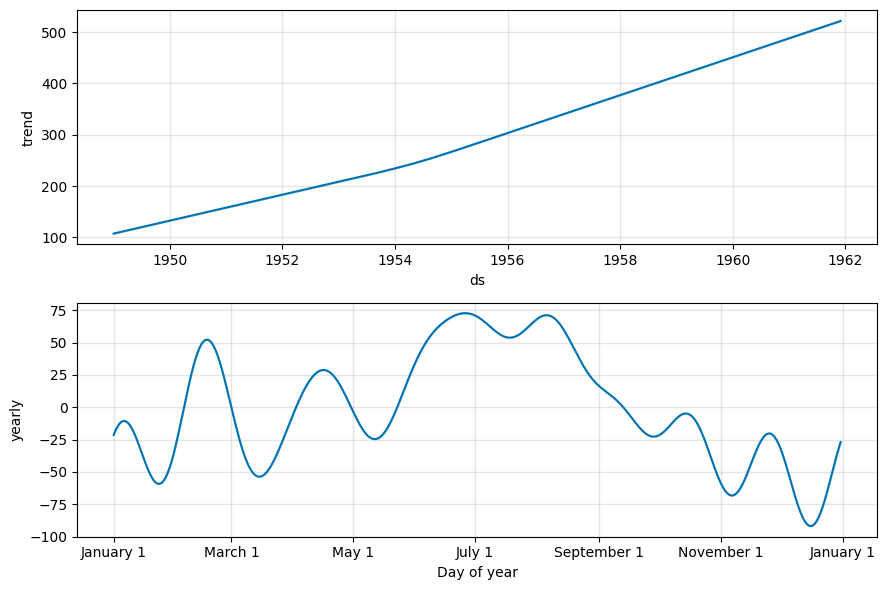

In [38]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

Time Series Analysis

1960-1962
Cross Validation
1960-61---Train dataset
1961-62--Test dataset
1962-63---Validation

In [40]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [42]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpflsnxu1g/udme24oh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpflsnxu1g/0_rree4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22990', 'data', 'file=/tmp/tmpflsnxu1g/udme24oh.json', 'init=/tmp/tmpflsnxu1g/0_rree4w.json', 'output', 'file=/tmp/tmpflsnxu1g/prophet_modelxcbkjpiw/prophet_model-20250212191839.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:18:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:18:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpflsnxu1g/246ri6_f.json
DEBUG:cmdstanpy:input tempfi

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.547043,158.287953,158.785868,150.0,1951-01-18
1,1951-03-01,171.930554,171.097693,172.726458,178.0,1951-01-18
2,1951-04-01,160.294061,158.664293,161.821049,163.0,1951-01-18
3,1951-05-01,146.088671,143.484740,148.507597,172.0,1951-01-18
4,1951-06-01,181.775393,177.992352,185.261503,178.0,1951-01-18


In [43]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1089.760435,33.011520,25.888183,0.078584,0.073832,0.079624,0.227273
1,42 days,1015.074527,31.860234,25.207161,0.076726,0.073832,0.077409,0.181818
2,46 days,909.815509,30.163148,24.622042,0.078579,0.078888,0.078319,0.136364
3,47 days,1044.416363,32.317431,26.737368,0.081351,0.085408,0.081498,0.136364
4,48 days,1034.025454,32.156266,26.194461,0.079480,0.085408,0.079693,0.181818


In [44]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1089.760435,33.011520,25.888183,0.078584,0.073832,0.079624,0.227273
1,42 days,1015.074527,31.860234,25.207161,0.076726,0.073832,0.077409,0.181818
2,46 days,909.815509,30.163148,24.622042,0.078579,0.078888,0.078319,0.136364
3,47 days,1044.416363,32.317431,26.737368,0.081351,0.085408,0.081498,0.136364
4,48 days,1034.025454,32.156266,26.194461,0.079480,0.085408,0.079693,0.181818


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


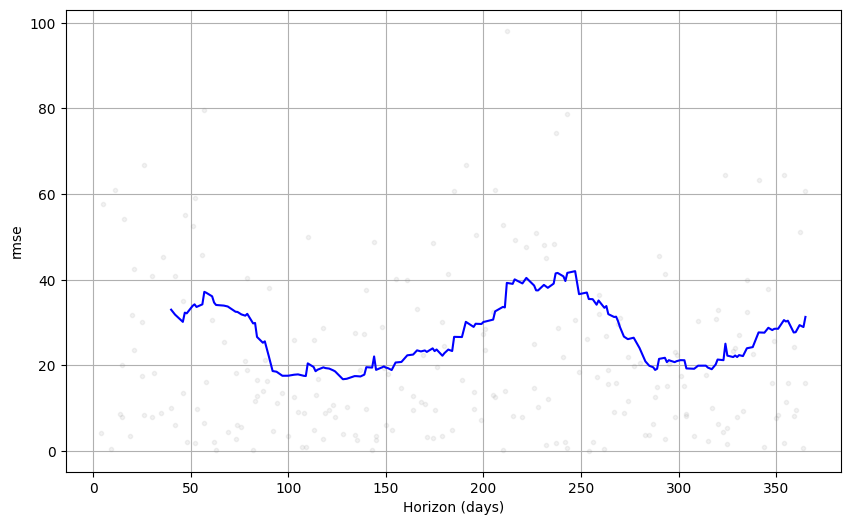

In [45]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')